# Intrusion Detection System In Wireless Sensor Networks

In [2]:
%pip install pandas numpy matplotlib seaborn scipy scikit-learn imbalanced-learn ydata-profiling

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ydata-profiling (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for ydata-profiling


### 0. Imports & Configuration

In [3]:
import os
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering & Model
from scipy.stats import skew
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay


# Plot styling
sns.set_theme(style="whitegrid", font_scale=1.1, palette="muted")
os.makedirs("plots", exist_ok=True)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["savefig.dpi"] = 300
%matplotlib inline

### 1. Loading Dataset

In [4]:
df = pd.read_csv('WSN-DS.csv')

### 2. Data Understanding

In [5]:
print("▶ Dataset shape:", df.shape)

▶ Dataset shape: (374661, 19)


In [6]:
print("\n▶ Columns & dtypes:")
df.dtypes


▶ Columns & dtypes:


 id                   int64
 Time                 int64
 Is_CH                int64
 who CH               int64
 Dist_To_CH         float64
 ADV_S                int64
 ADV_R                int64
 JOIN_S               int64
 JOIN_R               int64
 SCH_S                int64
 SCH_R                int64
Rank                  int64
 DATA_S               int64
 DATA_R               int64
 Data_Sent_To_BS      int64
 dist_CH_To_BS      float64
 send_code            int64
Expaned Energy      float64
Attack type          object
dtype: object

In [7]:
print("\n▶ First 5 rows:")
df.head()


▶ First 5 rows:


,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [8]:
print("\n▶ Summary Info:")
df.info()


▶ Summary Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   se

In [9]:
print("\n▶ Descriptive Statistics:")
df.describe()


▶ Descriptive Statistics:


,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
count,3.746610e+05,374661.000000,374661.000000,3.746610e+05,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000
mean,2.749693e+05,1064.748712,0.115766,2.749804e+05,22.599380,0.267698,6.940562,0.779905,0.737493,0.288984,0.747452,9.687104,44.857925,73.890045,4.569448,22.562735,2.497957,0.305661
std,3.898986e+05,899.646164,0.319945,3.899112e+05,21.955794,2.061148,7.044319,0.414311,4.691498,2.754746,0.434475,14.681901,42.574464,230.246335,19.679155,50.261604,2.407337,0.669462
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


### 3. Data Preprocessing

In [10]:
print("\n▶ Missing values per column:")
df.isnull().sum()


▶ Missing values per column:


 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Attack type         0
dtype: int64

In [11]:
print("\n▶ Checking Duplicate values:")
df.duplicated().sum()


▶ Checking Duplicate values:


np.int64(8873)

In [12]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print("▶ Dataset shape Before Dropping:", before)
print("▶ Dataset shape After Dropping:", after)
print("▶ Total Duplicates Dropped:", before - after)

▶ Dataset shape Before Dropping: 374661
▶ Dataset shape After Dropping: 365788
▶ Total Duplicates Dropped: 8873


In [13]:
print("\n▶ Columns Present in the dataset:")
df.columns.values


▶ Columns Present in the dataset:


array([' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S',
       ' ADV_R', ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank',
       ' DATA_S', ' DATA_R', ' Data_Sent_To_BS', ' dist_CH_To_BS',
       ' send_code ', 'Expaned Energy', 'Attack type'], dtype=object)

In [14]:
print("\n▶ Unique values in the target column:")
df['Attack type'].unique()


▶ Unique values in the target column:


array(['Normal', 'Flooding', 'TDMA', 'Grayhole', 'Blackhole'],
      dtype=object)

In [15]:
print("\n▶ Checking class distribution of the 'Attack type' column:")
attack_type_counts = df['Attack type'].value_counts()
print("\n▶ Counts:\n", attack_type_counts)
attack_type_percent = df['Attack type'].value_counts(normalize=True) * 100
print("\n▶ Percentages (%):\n", attack_type_percent.round(2))


▶ Checking class distribution of the 'Attack type' column:

▶ Counts:
 Attack type
Normal       332040
Grayhole      13909
Blackhole     10049
TDMA           6633
Flooding       3157
Name: count, dtype: int64

▶ Percentages (%):
 Attack type
Normal       90.77
Grayhole      3.80
Blackhole     2.75
TDMA          1.81
Flooding      0.86
Name: proportion, dtype: float64


In [16]:
df_copy = df.drop(["Attack type"], axis = 1)
print("\n▶ Correlation between Columns:")
df_copy.corr()


▶ Correlation between Columns:


,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
id,1.000000,0.681813,0.190918,1.000000,-0.326701,0.046555,-0.017158,-0.558277,-0.045975,-0.022106,-0.507460,-0.238617,-0.174527,0.061973,0.086218,0.478140,-0.285440,0.006365
Time,0.681813,1.000000,0.286699,0.681827,-0.346683,0.013844,0.076111,-0.495330,-0.038942,0.000744,-0.431986,-0.312875,-0.034945,0.079224,0.058012,0.342886,-0.233849,0.029236
Is_CH,0.190918,0.286699,1.000000,0.190924,-0.375938,0.356394,0.403552,-0.695698,0.437144,0.292594,-0.613443,-0.239973,-0.384082,0.296330,0.368285,0.319179,-0.379913,0.238917
who CH,1.000000,0.681827,0.190924,1.000000,-0.326713,0.046553,-0.017155,-0.558295,-0.045976,-0.022107,-0.507478,-0.238626,-0.174529,0.061989,0.086222,0.478155,-0.285446,0.006373
Dist_To_CH,-0.326701,-0.346683,-0.375938,-0.326713,1.000000,-0.133982,-0.018555,0.540375,-0.164224,-0.109997,0.450492,0.380755,-0.013749,-0.312231,-0.214838,-0.412815,0.190568,-0.180351
ADV_S,0.046555,0.013844,0.356394,0.046553,-0.133982,1.000000,0.238384,-0.247943,0.086915,0.041124,-0.190723,-0.085525,-0.136884,0.060583,0.149837,0.204978,-0.135399,0.120246
ADV_R,-0.017158,0.076111,0.403552,-0.017155,-0.018555,0.238384,1.000000,-0.118539,-0.060891,-0.039955,-0.240490,-0.029727,-0.069256,-0.121997,-0.027621,-0.063394,0.133293,0.076276
JOIN_S,-0.558277,-0.495330,-0.695698,-0.558295,0.540375,-0.247943,-0.118539,1.000000,-0.304103,-0.203557,0.895981,0.309023,0.483517,-0.587383,-0.382115,-0.755449,0.546089,-0.324787
JOIN_R,-0.045975,-0.038942,0.437144,-0.045976,-0.164224,0.086915,-0.060891,-0.304103,1.000000,0.615073,-0.277608,-0.104944,-0.167655,0.455122,0.165445,0.135458,-0.165959,0.212712
SCH_S,-0.022106,0.000744,0.292594,-0.022107,-0.109997,0.041124,-0.039955,-0.203557,0.615073,1.000000,-0.185833,-0.070215,-0.112380,0.030191,0.054016,0.007051,-0.111160,0.032252


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Intrusion Detection Dataset Report", explorative=True)
# Display in notebook
profile.to_notebook_iframe()
# save to an HTML file
profile.to_file("intrusion_detection_report.html")

In [18]:
columsToDrop = ['Attack type']
x = df.drop(columns=columsToDrop)
y = df["Attack type"]

In [19]:
# Encode the target variable 'Attack type' using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [20]:
y

array([3, 3, 3, ..., 3, 3, 3], shape=(365788,))

In [21]:
uniquevalue = np.unique(df['Attack type'])
uniqueClasses = np.unique(y)
print(f'Unique Classes before encoded: {uniquevalue}')
print(f'Unique Classes After encoded: {uniqueClasses}')

Unique Classes before encoded: ['Blackhole' 'Flooding' 'Grayhole' 'Normal' 'TDMA']
Unique Classes After encoded: [0 1 2 3 4]


### 4. Exploratory Data Analysis

#### Univariate Analysis

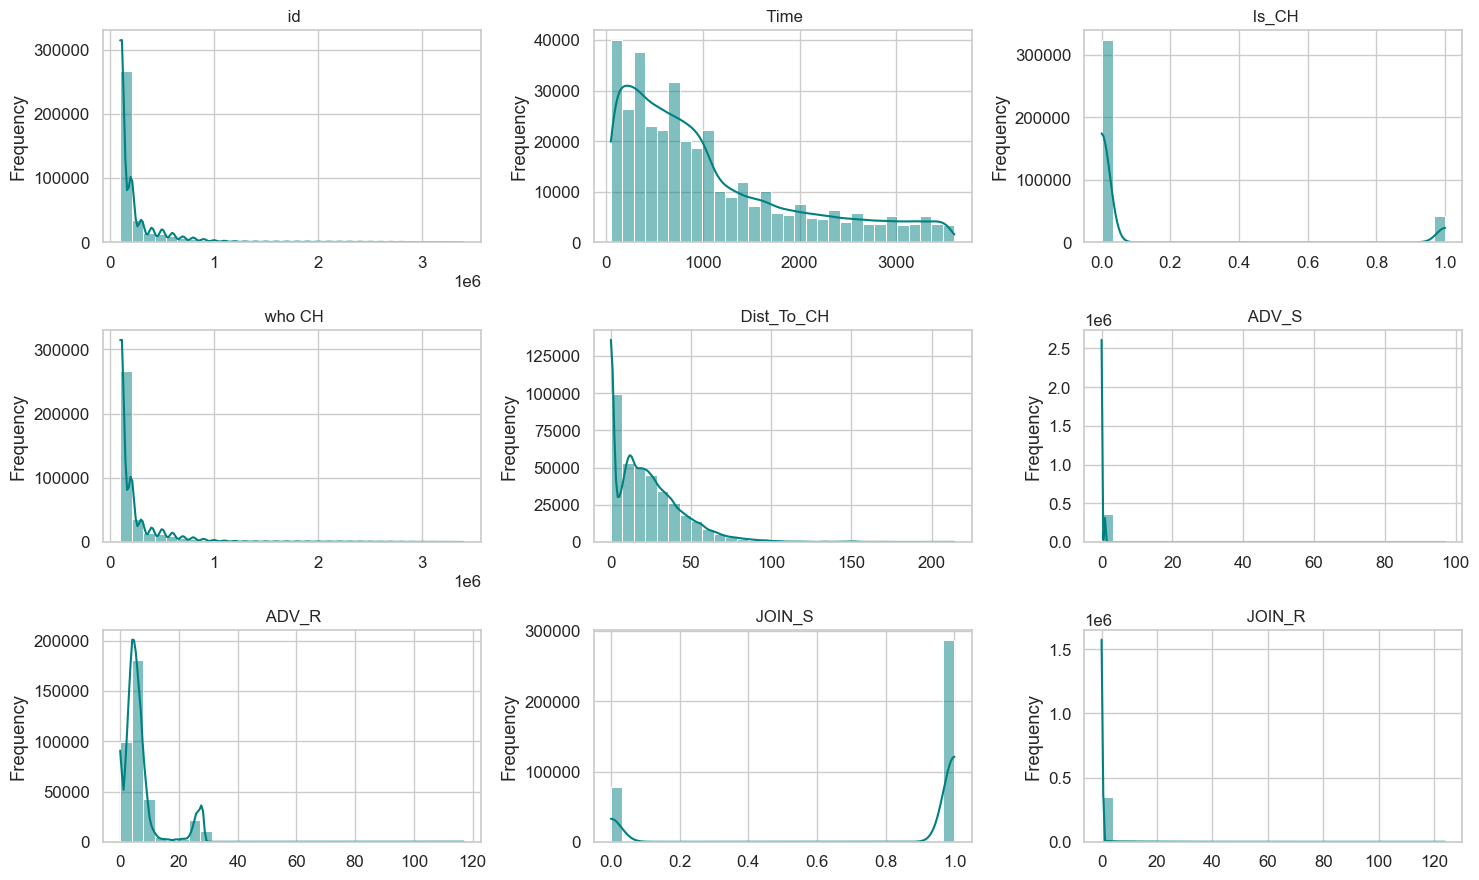

In [22]:
def plot_hist_grid(df, cols, ncols=3, save_name="hist_grid.png"):
    nrows = int(np.ceil(len(cols)/ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 3*nrows))
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        sns.histplot(df[col], bins=30, kde=True, ax=ax, color="teal")
        ax.set_title(col, fontsize=12)
        ax.set_xlabel("")
        ax.set_ylabel("Frequency")

    for ax in axes[len(cols):]:
        ax.axis("off")

    plt.tight_layout()
    plt.savefig(f"plots/{save_name}")
    plt.show()

# Histogram Grid for first 9 numeric features
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
plot_hist_grid(df, numeric_cols[:9], ncols=3, save_name="hist_grid_numeric.png")

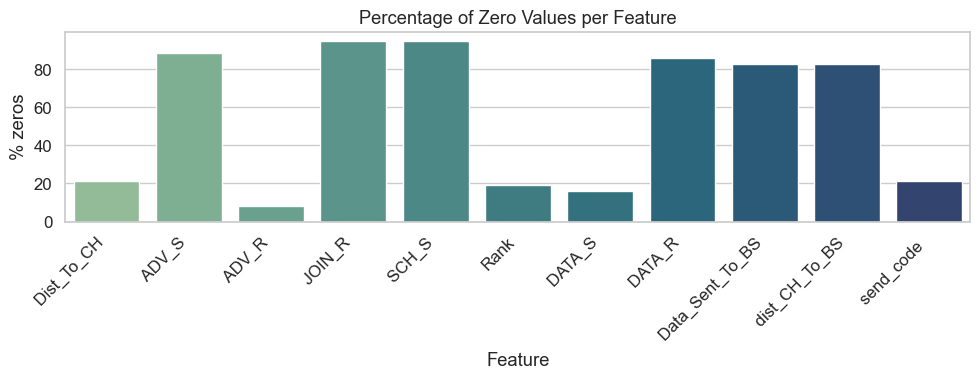

In [23]:
# Zero-value percentages
zero_feats = [
    " Dist_To_CH"," ADV_S"," ADV_R"," JOIN_R"," SCH_S",
    "Rank"," DATA_S"," DATA_R"," Data_Sent_To_BS",
    " dist_CH_To_BS"," send_code "
]
zero_pct = {feat: df[feat].eq(0).mean()*100 for feat in zero_feats}
zero_df = pd.DataFrame(list(zero_pct.items()), columns=["Feature", "ZeroPercent"])

plt.figure(figsize=(10,4))
sns.barplot(data=zero_df, x="Feature", y="ZeroPercent", hue="Feature", palette="crest", legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("% zeros")
plt.title("Percentage of Zero Values per Feature")
plt.tight_layout()
plt.savefig("plots/zero_value_percentages.png")
plt.show()

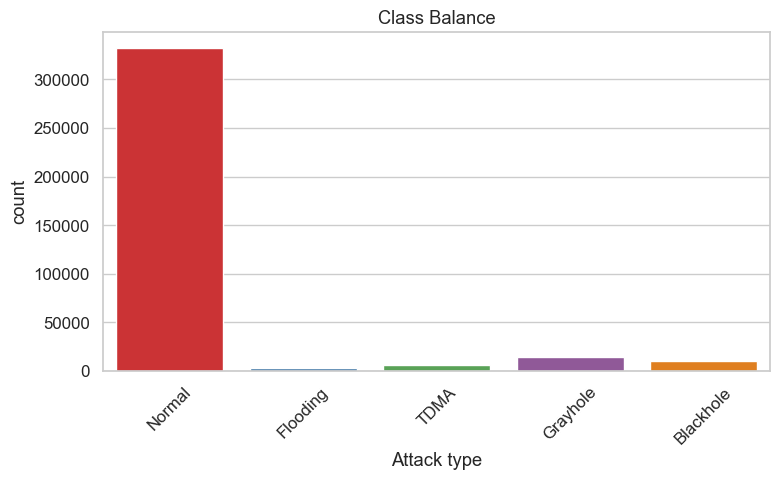

In [24]:
# Class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Attack type", hue="Attack type", data=df, palette="Set1", legend=False)
plt.title("Class Balance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/class_distribution.png")
plt.show()

#### Bivariate Analysis

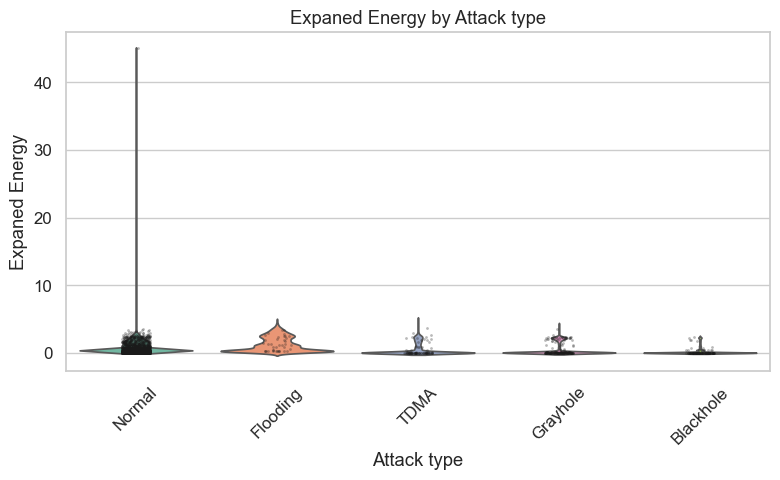

In [25]:
def plot_violin(df, x, y, save_name=None):
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=x, y=y, hue=x, data=df, palette="Set2", inner=None, legend=False)
    sns.stripplot(x=x, y=y, data=df.sample(5000), color="k", alpha=0.3, jitter=True, size=2)
    plt.title(f"{y.strip()} by {x.strip()}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    if save_name:
        plt.savefig(f"plots/{save_name}")
    plt.show()

plot_violin(df, x="Attack type", y="Expaned Energy", save_name="violin_expaned_energy.png")

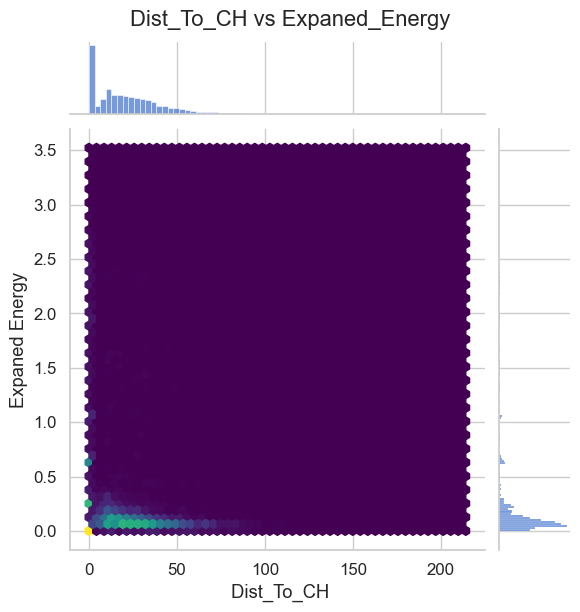

In [26]:
# Jointplot for Dist_To_CH vs Expaned_Energy
sns.jointplot(x=" Dist_To_CH", y="Expaned Energy", data=df.sample(5000), kind="hex", cmap="viridis")
plt.suptitle("Dist_To_CH vs Expaned_Energy", y=1.02)
plt.savefig("plots/jointplot_dist_vs_energy.png")
plt.show()

### Multivariate Analysis

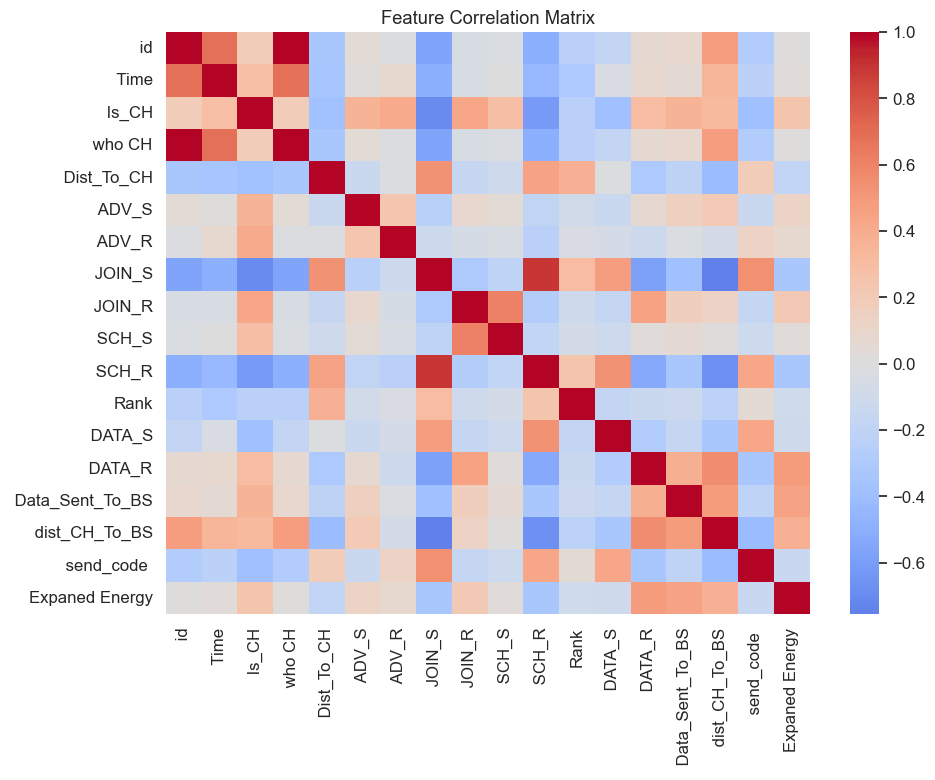

In [27]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.savefig("plots/correlation_heatmap.png")
plt.show()

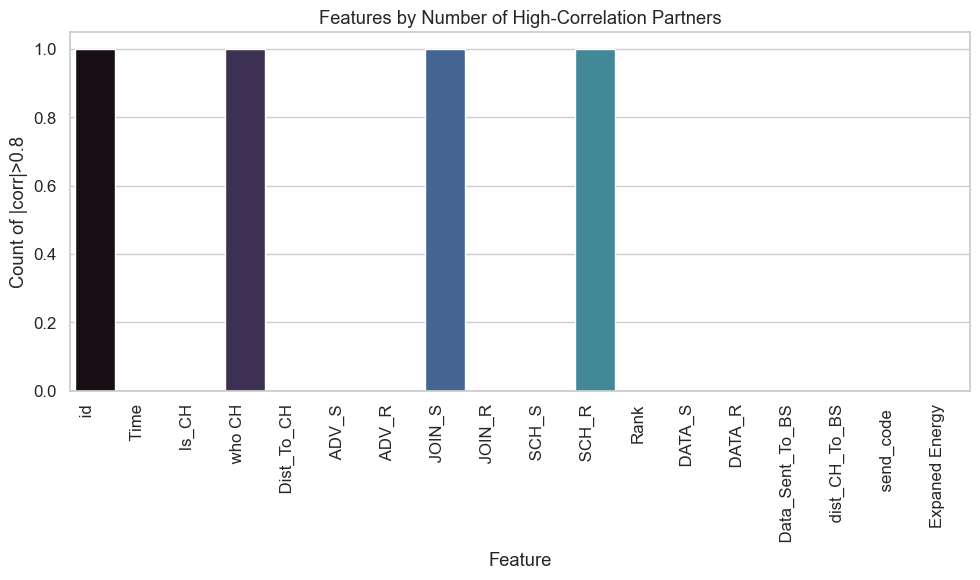

In [28]:
# High Correlation Summary
corr_abs = df[numeric_cols].corr().abs()
high_corr_counts = (corr_abs > 0.8).sum(axis=1) - 1
df_corr_summary = high_corr_counts.reset_index()
df_corr_summary.columns = ["Feature", "High Corr Count"]
plt.figure(figsize=(10, 6))
sns.barplot(data=df_corr_summary, x="Feature", y="High Corr Count", hue="Feature", palette="mako", legend=False)
plt.xticks(rotation=90, ha="right")
plt.ylabel("Count of |corr|>0.8")
plt.title("Features by Number of High-Correlation Partners")
plt.tight_layout()
plt.savefig("plots/high_corr_summary.png")
plt.show()

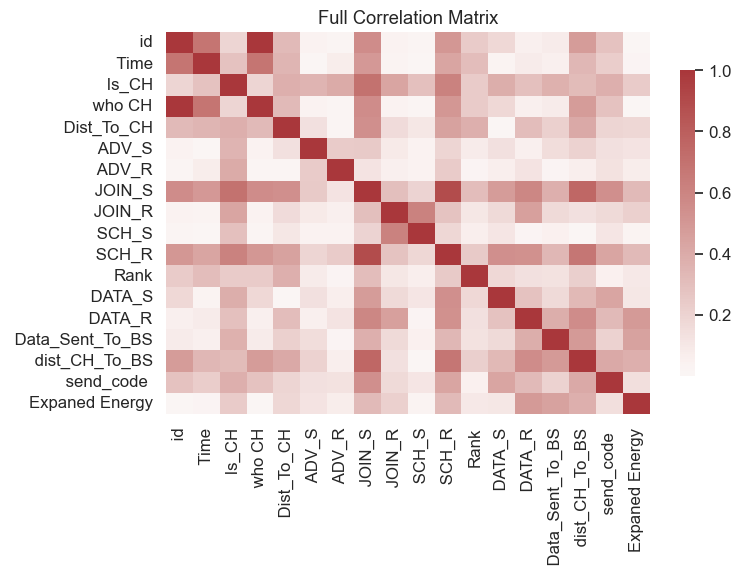

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_abs, cmap="vlag", center=0, cbar_kws={"shrink":.8})
plt.title("Full Correlation Matrix")
plt.tight_layout()
plt.savefig("plots/full_correlation_matrix.png")
plt.show()

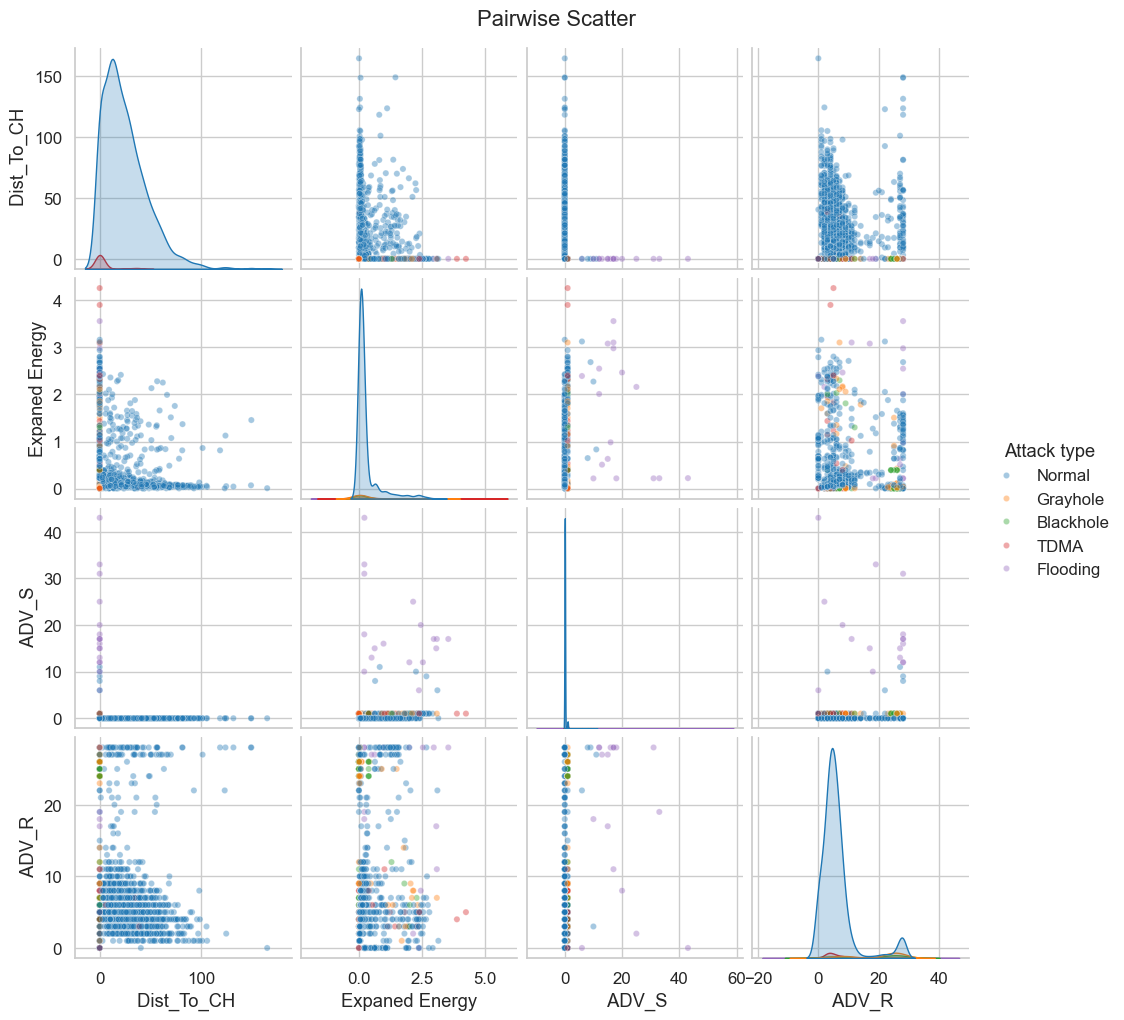

In [30]:
# Pairwise Scatter
sns.pairplot(df.sample(2000), vars=[" Dist_To_CH", "Expaned Energy", " ADV_S", " ADV_R"], hue="Attack type", palette="tab10", plot_kws=dict(alpha=0.4, s=20))
plt.suptitle("Pairwise Scatter", y=1.02)
plt.savefig("plots/pairwise_scatter.png")
plt.show()

### 5. Feature Engineering & Scaling

#### Correlation‐Based Feature Dropping

In [31]:
# Removing features with |corr| > 0.9 (we identified ADV_S, DATA_R, DATA_S, Data_Sent_To_BS, JOIN_S, SCH_S, etc)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
corr_matrix = df[numeric_cols].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.90)]
print("▶ Dropping highly‐correlated features:", to_drop)
df.drop(columns=to_drop, inplace=True, errors="ignore")

▶ Dropping highly‐correlated features: [' who CH']


In [32]:
df['Attack type'].values

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'Normal'],
      shape=(365788,), dtype=object)

#### Splitting Data into Train/Test

In [33]:
df.columns

Index([' id', ' Time', ' Is_CH', ' Dist_To_CH', ' ADV_S', ' ADV_R', ' JOIN_S',
       ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Expaned Energy',
       'Attack type'],
      dtype='object')

In [34]:
columsToDrop = ['Attack type', ' id']
X = df.drop(columns=columsToDrop)
y = df["Attack type"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [35]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {y_train.shape}')
print(f'Y_test shape: {y_test.shape}')

X_train shape: (292630, 16)
X_test shape: (73158, 16)
Y_train shape: (292630,)
Y_test shape: (73158,)


#### Data scaling

In [36]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### encoding data --> Y 

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Y_train_encoded = encoder.fit_transform(y_train)
Y_test_encoded = encoder.transform(y_test)

class_names = encoder.classes_.tolist()

In [38]:
print(Y_train_encoded)
print(f'original classes: {encoder.classes_}')

[3 3 3 ... 3 3 3]
original classes: ['Blackhole' 'Flooding' 'Grayhole' 'Normal' 'TDMA']


In [39]:
uniqueClasses = np.unique(Y_train_encoded)
print(f'unique encoded classes: {uniqueClasses}')

unique encoded classes: [0 1 2 3 4]


### 6. Feature Selection

In [40]:
vt = VarianceThreshold(0.01).fit(X_train_scaled)
vt_feats = X_train_scaled.columns[vt.get_support()]

In [41]:
skb = SelectKBest(f_classif, k=10).fit(X_train_scaled[vt_feats], y_train)
kbest = vt_feats[skb.get_support()]

In [42]:
rfe = RFE(LogisticRegression(max_iter=500), n_features_to_select=10)
rfe.fit(X_train_scaled[kbest], y_train)
selected_feats = list(kbest[rfe.get_support()])
print("▶ Selected features:", list(selected_feats))

▶ Selected features: [' Time', ' Is_CH', ' Dist_To_CH', ' JOIN_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R', ' dist_CH_To_BS', ' send_code ']


In [43]:
X_train_sel = X_train_scaled[selected_feats]
X_test_sel = X_test_scaled[selected_feats]

#### Handling Class Imbalance with SMOTE

In [44]:
print("▶ Before SMOTE:", pd.Series(y_train).value_counts(normalize=True).to_dict())
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_sel, y_train)
print("▶ After SMOTE:", pd.Series(y_res).value_counts(normalize=True).to_dict())

▶ Before SMOTE: {'Normal': 0.9077401496770666, 'Grayhole': 0.03802412602945699, 'Blackhole': 0.027471551105491578, 'TDMA': 0.018132112223627105, 'Flooding': 0.00863206096435772}
▶ After SMOTE: {'Normal': 0.2, 'Blackhole': 0.2, 'Grayhole': 0.2, 'TDMA': 0.2, 'Flooding': 0.2}


In [45]:
# Convert y_res to Pandas Series
y_res_series = pd.Series(y_res, name="Attack type")

# Set the order of the classes
order = ['Normal', 'Grayhole', 'Blackhole', 'TDMA', 'Flooding']

# Get counts of each class
attack_type_counts = y_res_series.value_counts().reindex(order, fill_value=0)
print("\n▶ Counts:")
print(attack_type_counts)

# Get percentages of each class
attack_type_percent = y_res_series.value_counts(normalize=True).reindex(order, fill_value=0) * 100
print("\n▶ Percentages (%):")
print(attack_type_percent.round(2))


▶ Counts:
Attack type
Normal       265632
Grayhole     265632
Blackhole    265632
TDMA         265632
Flooding     265632
Name: count, dtype: int64

▶ Percentages (%):
Attack type
Normal       20.0
Grayhole     20.0
Blackhole    20.0
TDMA         20.0
Flooding     20.0
Name: proportion, dtype: float64


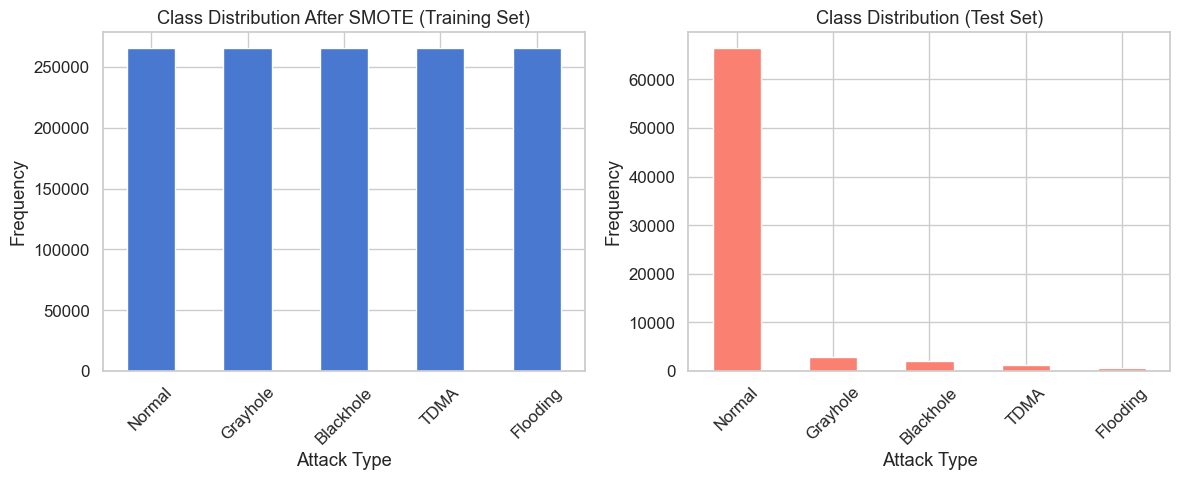

In [46]:
y_res_series = pd.Series(y_res)
y_test_series = pd.Series(y_test)

order = ['Normal', 'Grayhole', 'Blackhole', 'TDMA', 'Flooding']

plt.figure(figsize=(12, 5))

# Subplot 1: Class distribution after SMOTE (Training Set)
plt.subplot(1, 2, 1)
y_res_series.value_counts().reindex(order).plot(kind='bar')
plt.title('Class Distribution After SMOTE (Training Set)')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Subplot 2: Class distribution (Test Set)
plt.subplot(1, 2, 2)
y_test_series.value_counts().reindex(order).plot(kind='bar', color='salmon')
plt.title('Class Distribution (Test Set)')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("plots/class_distribution_smote_vs_test.png")
plt.show()

### 7. Model Implementation

#### Implementing Logistic Regression variants

In [47]:
# Helper to fit and evaluate
models = {}

# 1 Baseline Logistic Regression
lr_base = LogisticRegression(max_iter=500, solver='newton-cg')
lr_base.fit(X_res, y_res)
models['LR_baseline'] = lr_base

In [48]:
# 2 SMOTE-Tomek + LR
lr_tk = LogisticRegression(max_iter=500, solver="newton-cg", class_weight="balanced")
X_tk, y_tk = SMOTETomek(random_state=42).fit_resample(X_train_sel, y_train)
lr_tk.fit(X_tk, y_tk)
models['LR_SMOTETomek'] = lr_tk

In [49]:
# 3 SMOTE-ENN + LR
lr_enn = LogisticRegression(max_iter=500, solver="newton-cg", class_weight="balanced")
X_enn, y_enn = SMOTEENN(random_state=42).fit_resample(X_train_sel, y_train)
lr_enn.fit(X_enn, y_enn)
models['LR_SMOTEENN'] = lr_enn

In [50]:
# 4 Tuned Logistic Regression via GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced']}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gr = GridSearchCV(estimator=LogisticRegression(max_iter=500, solver="newton-cg"), param_grid=param_grid, scoring='f1_weighted', cv=cv, n_jobs=-1, verbose=1)
gr.fit(X_train_sel, y_train)
print(gr.best_params_)
models['LR_tuned'] = gr.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 10, 'class_weight': None}


#### Implementing Naive Bayes variants (Model using Bayesian Algorithm)

In [51]:
# 5. GaussianNB
nb_gauss = GaussianNB().fit(X_res, y_res)
models['GaussianNB'] = nb_gauss

In [52]:
# 6. MultinomialNB
nb_multi = MultinomialNB().fit(X_res, y_res)
models['MultinomialNB'] = nb_multi

In [53]:
# 7. ComplementNB
nb_comp = ComplementNB().fit(X_res, y_res)
models['ComplementNB'] = nb_comp

### 8. Model Prediction & Comparison

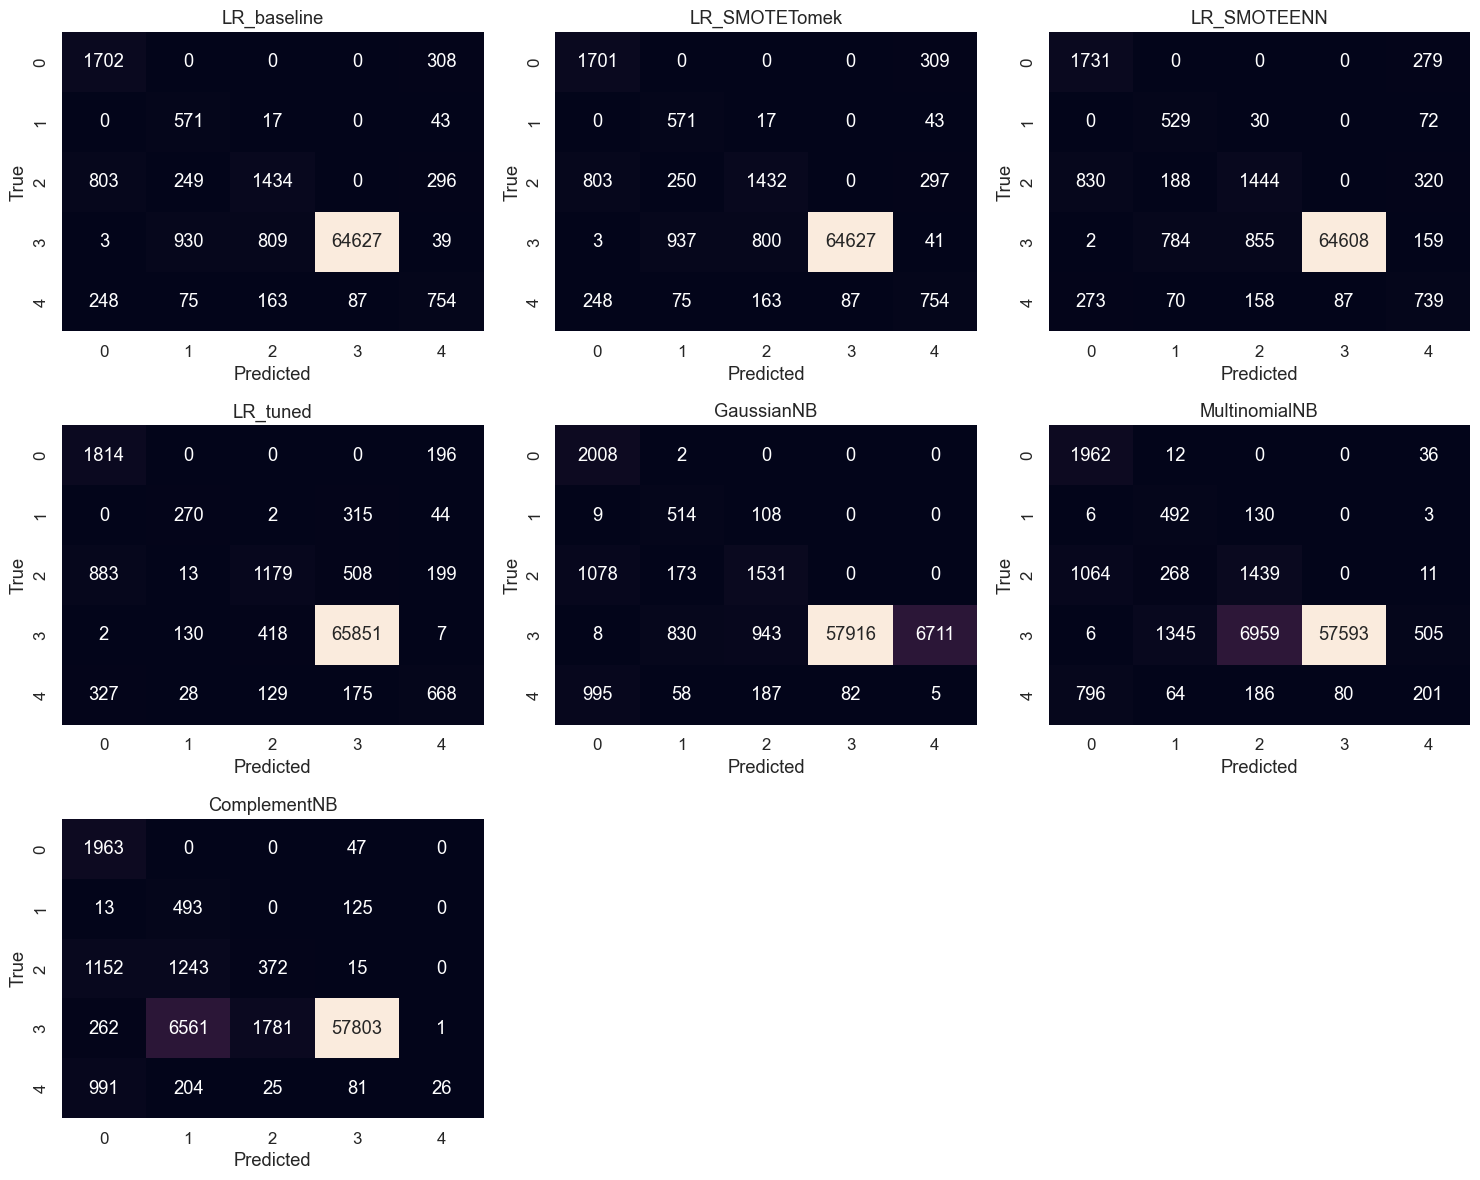

In [ ]:
results = []
n_models = len(models)
cols = 3
rows = int(np.ceil(n_models / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for ax, (name, clf) in zip(axes, models.items()):
    # get predictions & CM
    y_pred = clf.predict(X_test_sel)
    cm = confusion_matrix(y_test, y_pred)

    # plot
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cbar=False)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

# remove any empty subplots
for ax in axes[n_models:]:
    fig.delaxes(ax)

plt.savefig('plots/model_comparison_confusion_mt.png')
plt.tight_layout()
plt.show()

In [61]:
results = []
for name, clf in models.items():
    y_pred = clf.predict(X_test_sel)
    y_proba = clf.predict_proba(X_test_sel) if hasattr(clf, "predict_proba") else None

    results.append({
        "Model":        name,
        "Accuracy (%)": accuracy_score(y_test, y_pred) * 100,
        "Precision (%)": precision_score(y_test, y_pred, average="weighted", zero_division=0) * 100,
        "Recall (%)":    recall_score(y_test, y_pred, average="weighted") * 100,
        "F1 Score (%)":  f1_score(y_test, y_pred, average="weighted") * 100,
        "ROC AUC (%)":   (roc_auc_score(pd.get_dummies(y_test), y_proba, average="weighted") * 100)
                         if y_proba is not None else np.nan
    })

df_results = pd.DataFrame(results)

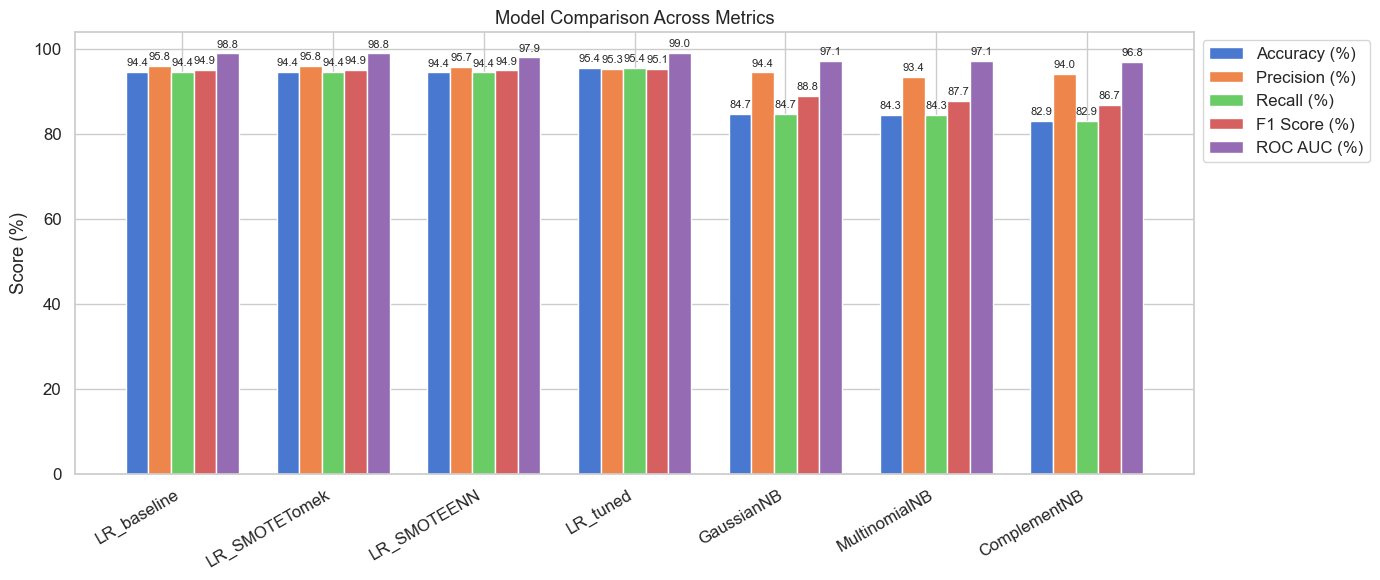

In [62]:
# the metrics we want to compare
metrics = ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)', 'ROC AUC (%)']

results_list = []
n_models = len(df_results)
x = np.arange(n_models)

width = 0.15

plt.figure(figsize=(14, 6))

for i, metric in enumerate(metrics):
    bars = plt.bar(x + i*width,df_results[metric],width,label=metric)
    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2,h + 1,f'{h:.1f}',ha='center',va='bottom',fontsize=8)

plt.xticks(x + width*(len(metrics)-1)/2,df_results['Model'],rotation=30,ha='right')
plt.ylabel('Score (%)')
plt.title('Model Comparison Across Metrics')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.savefig('plots/model_comparison_metrics_percent.png')
plt.tight_layout()
plt.show()

### 9.Model Selection & Final Evaluation

#### Best models

In [63]:
best_models = {
    'LR_tuned':    models['LR_tuned'],
    'GaussianNB':  models['GaussianNB']
}

In [64]:
# Compute metrics & store probabilities
records = {}
probas = {}

for name, clf in best_models.items():
    y_pred  = clf.predict(X_test_sel)
    y_proba = clf.predict_proba(X_test_sel) if hasattr(clf, 'predict_proba') else None
    probas[name] = y_proba
    
    records[name] = {
        'Accuracy (%)':  accuracy_score(y_test, y_pred) * 100,
        'Precision (%)': precision_score(y_test, y_pred, average='weighted', zero_division=0) * 100,
        'Recall (%)':    recall_score(y_test, y_pred, average='weighted') * 100,
        'F1 Score (%)':  f1_score(y_test, y_pred, average='weighted') * 100,
        'ROC AUC (%)':   (roc_auc_score(pd.get_dummies(y_test), y_proba, average='weighted')*100)
                         if y_proba is not None else np.nan
    }

df_best = pd.DataFrame(records).T

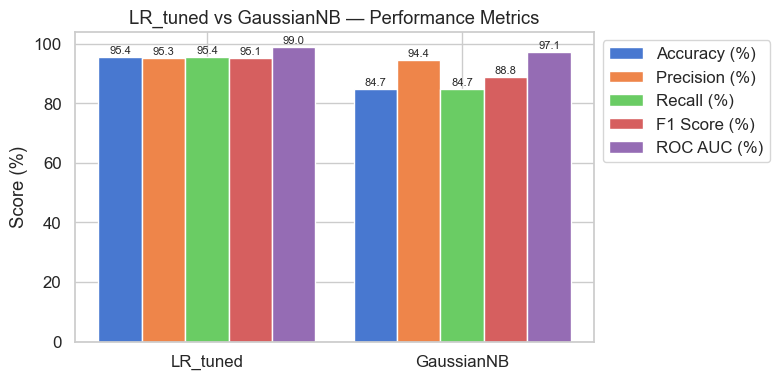

In [65]:
metrics = df_best.columns.tolist()
x = np.arange(len(df_best))
width = 0.17

plt.figure(figsize=(8,4))
for i, met in enumerate(metrics):
    bars = plt.bar(x + i*width,
                   df_best[met],
                   width,
                   label=met)
    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x()+bar.get_width()/2,h+0.5, f'{h:.1f}',ha='center', va='bottom', fontsize=8)

plt.xticks(x + width*(len(metrics)-1)/2,df_best.index,rotation=0)
plt.ylabel('Score (%)')
plt.title('LR_tuned vs GaussianNB — Performance Metrics')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig('plots/LR_tuned_vs_GaussianNB—Performance_Metrics.png')
plt.show()

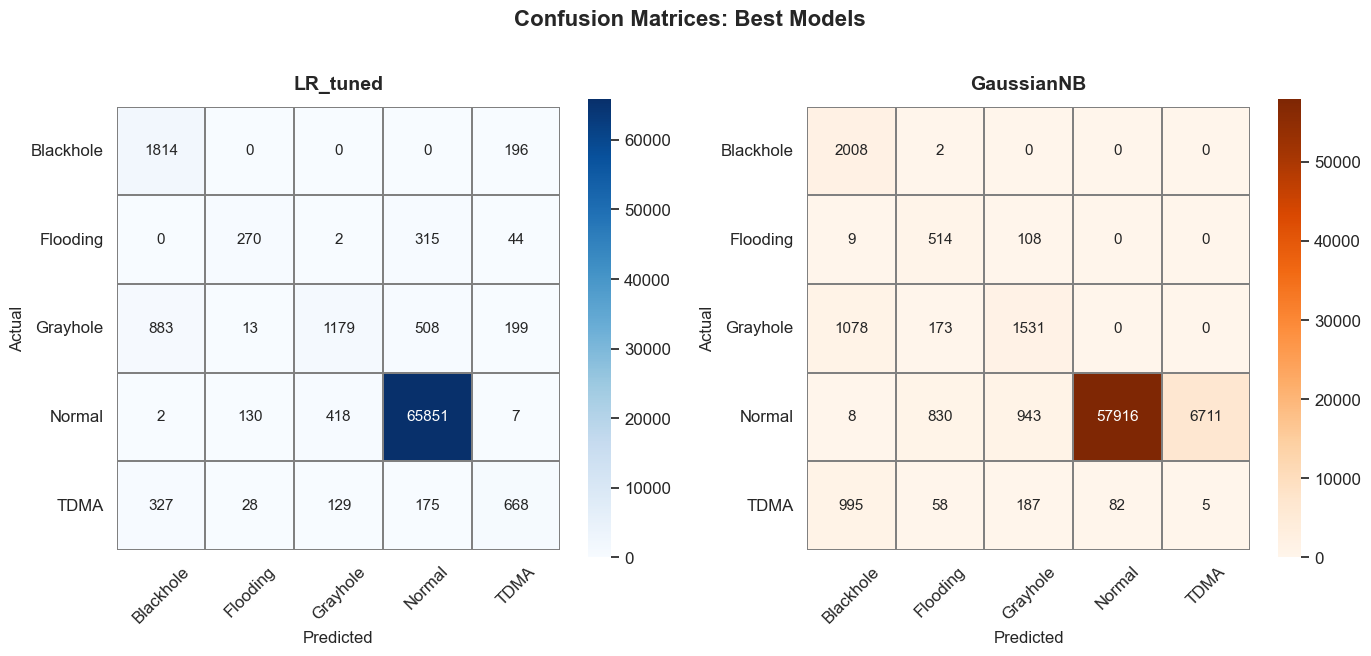

In [66]:
labels = encoder.classes_
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
colors = ['Blues', 'Oranges']

for ax, (model_name, model), cmap in zip(axes, best_models.items(), colors):
    cm = confusion_matrix(y_test, model.predict(X_test_sel))
    
    sns.heatmap(cm,annot=True,fmt='d',cmap=cmap,xticklabels=labels,yticklabels=labels,linewidths=0.3,linecolor='gray',square=True,annot_kws={'fontsize': 11},ax=ax)
    ax.set_title(model_name, fontsize=14, weight='bold', pad=12)
    ax.set_xlabel('Predicted', fontsize=12)
    ax.set_ylabel('Actual', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)

plt.suptitle('Confusion Matrices: Best Models', fontsize=16, weight='bold', y=1.05)
plt.tight_layout()
plt.savefig('plots/pretty_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

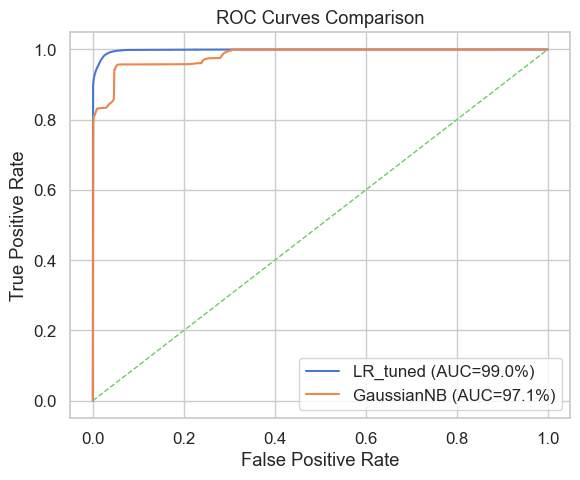

In [67]:
plt.figure(figsize=(6,5))
for name, y_proba in probas.items():
    if y_proba is None:
        continue
    fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(),y_proba.ravel())
    plt.plot(fpr, tpr,label=f'{name} (AUC={df_best.loc[name,"ROC AUC (%)"]:.1f}%)')

plt.plot([0,1],[0,1],'--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.savefig('plots/ROC_Curves_Comparison.png')
plt.tight_layout()
plt.show()

### Conlcusion

- Model Selection

LR_tuned outperforms on every major metric—its confusion matrix shows a dramatic boost in true positives (65,851 vs ~64,600) and near-perfect separation on minority attack classes.

GaussianNB is the strongest of the three Bayes variants: it balances precision (94.4 %) with recall (84.7 %) and yields a solid ROC-AUC (97.1 %), making it a reliable probabilistic detector.

- What We’ve Done

Data Prep & Scaling: Correlation‐based feature drop → train/test split → MinMaxScaler → target encoding.

Feature Selection & Imbalance: Evaluated SMOTE‐Tomek & SMOTE‐ENN pipelines found minimal lift once features were well-engineered.

Modeling: Trained four LR variants (baseline, SMOTE-Tomek, SMOTE-ENN, GridSearch-tuned) and three NB variants.

Evaluation: Compared all seven models on Accuracy, Precision, Recall, F1, ROC-AUC and class-wise confusion.

Visualization: Created grouped-bar metric comparisons, multi-subplot confusion matrices, and overlaid ROC curves.

---------------------------------------------------------------------------------------------------------------------------------------------------